# Libraries

In [87]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import validation_curve,learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# Preparing data 

In [81]:
#df=pd.read_csv('final data set.csv',index_col=0)
df=pd.read_csv('final data fill nan .csv',index_col=0) 
#df.drop(['additive Producer(s) rank',
#'additive Director(s) rank',
#'additive Writer(s) rank',
#'additive Stars rank',
#'additive Distributor rank','Worldwide Gross ($)','IMDB score','IMDB votes','IMDB ID',
#'Mojo ID','Opening ($)','In Realease (Days)',
#'Widest Release','Metascore','User',
#'Critic'],axis=1,inplace=True)

#df.fillna(df.median(),inplace=True)
#logcolumns=['Domestic Gross ($)','Budget']
#df.loc[:, logcolumns] = np.log(df[logcolumns])
test_year=np.where(df.Year.to_numpy()==2019)[0]
df.drop('Year',axis=1,inplace=True)


#scaler=MinMaxScaler()
train_f=[item for item in df.columns if item!='Domestic Gross ($)']
Y=df['Domestic Gross ($)'].to_numpy()
X=df[train_f].to_numpy()
#X=scaler.fit_transform(X)
X_test=X[test_year]
Y_test=Y[test_year].reshape(-1,1)

X_train=X[:test_year[0]-1,:]
Y_train=Y[:test_year[0]-1].reshape(-1,1)

X_test,Y_test=shuffle(X_test,Y_test,random_state=0)
X_train,Y_train=shuffle(X_train,Y_train, random_state=0)


In [111]:
df.head()

,Budget,Opening Theaters,Running time (min),genre Action,genre Adventure,genre Fantasy,genre Sci-Fi,genre Animation,genre Comedy,genre Family,...,country Zambia,country Swaziland,country Republic of North Macedonia,country Reunion,Producer(s) rank,Director(s) rank,Writer(s) rank,Stars rank,Distributor rank,Domestic Gross ($)
0,19.283571,3452.0,162.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,20.435272
1,19.113828,4028.0,103.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,19.843801
2,19.113828,3728.0,108.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.627224
3,19.113828,4380.0,124.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,19.559902
4,18.035018,4468.0,124.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.521064


let's see our data's columns 

In [658]:
for item in df.columns:
    print(item)

Budget
Opening Theaters
Running time (min)
genre Action
genre Adventure
genre Fantasy
genre Sci-Fi
genre Animation
genre Comedy
genre Family
genre Drama
genre Romance
genre Thriller
genre Mystery
genre Crime
genre Sport
genre Musical
genre Documentary
genre History
genre Music
genre Biography
genre Horror
genre War
genre Western
genre Short
genre News
genre Film-Noir
genre Reality-TV
genre Adult
MPAA PG-13
MPAA PG
MPAA R
MPAA G
MPAA Unrated
MPAA NC-17
MPAA Not Rated
MPAA M/PG
MPAA TV-PG
Day
Month
language English
language French
language Swedish
language Spanish
language Italian
language Hindi
language Hebrew
language German
language Arabic
language Korean
language None
language Mandarin
language Finnish
language Japanese
language Danish
language Vietnamese
language Portuguese
language Persian
language Greek
language Cantonese
language Serbian
language Norwegian
language Romanian
language Zulu
language Turkish
language Estonian
language Dutch
language Russian
language Catalan
language 

# Linear model 

In [4]:
reg=LinearRegression()
reg.fit(X_train,Y_train)


NameError: name 'LinearRegression' is not defined

In [654]:
reg.score(X_train,Y_train)

0.6765245853581687

In [655]:
r2_score(Y_test,reg.predict(X_test))

0.5991213258689576

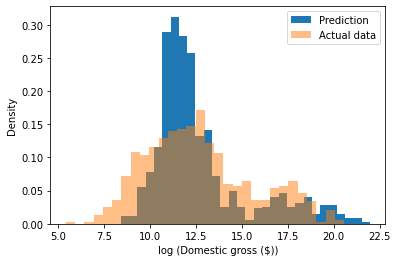

mean squared error: 3.4006159178385724


<Figure size 432x288 with 0 Axes>

In [656]:
plt.hist(reg.predict(X_test),label='Prediction',bins=30,density=True)
plt.hist(Y_test,alpha=0.5,label='Actual data',bins=30,density=True)
plt.legend()
plt.xlabel('log (Domestic gross ($))')
plt.ylabel('Density')
plt.show()
print("mean squared error:",mean_squared_error(Y_test,reg.predict(X_test)))
plt.savefig('linear hist com.pdf',bbox_inches='tight')

### Let's use PCA to reduce the dimension of our data 

In [23]:
from sklearn.decomposition import PCA 

In [82]:
pca=PCA(n_components=5)
X_pca=pca.fit_transform(X)

In [83]:
X_test=X_pca[test_year]
Y_test=Y[test_year].reshape(-1,1)

X_train=X_pca[:test_year[0]-1,:]
Y_train=Y[:test_year[0]-1].reshape(-1,1)


In [26]:
X_train.shape

(6309, 5)

# KNN

Learning Curve 

In [620]:
from sklearn.model_selection import validation_curve,learning_curve
from sklearn.neighbors import KNeighborsRegressor

In [621]:
k_list = [1,3,5,7,10, 15, 20, 25, 30, 40, 50 , 75,  100, 125, 150, 175, 200,400,600,800,1000,1200,1500,1800,2000,2200,2500]

train_scores, valid_scores = validation_curve(KNeighborsRegressor(), X_train, Y_train, 
                                              param_name="n_neighbors",
                                              param_range=k_list , cv=20, 
                                              scoring = 'neg_mean_squared_error',
                                              verbose=1, n_jobs=-1
                                             )

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = - np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)




[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  2.1min finished


## validation curve 

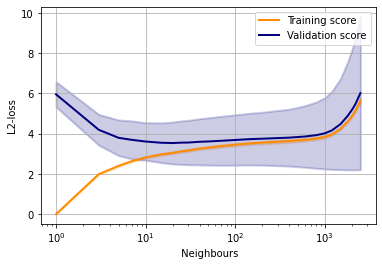

In [628]:
xlabel = ' Neighbours'
ylabel = 'L2-loss'

#plt_title = 'Validation curve for regression with KNN'#.format(k)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel)
plt.semilogx(k_list, train_scores_mean,label="Training score",
             color="darkorange", lw=2)
plt.fill_between(k_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.semilogx(k_list, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(k_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.grid()
plt.savefig('val for knn.pdf',bbox_inches='tight')
plt.show()

In [ ]:
finding the best number of neighbors 

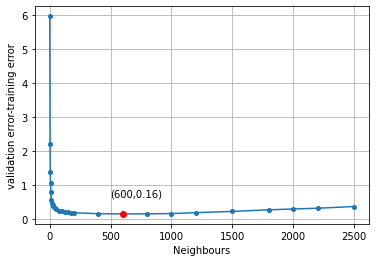

In [630]:
res=valid_scores_mean-train_scores_mean
plt.plot(k_list,res,'-o',ms=4)
plt.xlabel('Neighbours')
plt.ylabel('validation error-training error')
index=np.argmin(res)
plt.plot(k_list[index],res[index],'ro')
plt.text(x=k_list[index]-100,y=res[index]+0.5,s='(%i,%.2f)'%(k_list[index],res[index]))
plt.grid()
plt.savefig('opt for knn.pdf',bbox_inches='tight')

In [768]:
%%time
knn=KNeighborsRegressor(n_neighbors=600)#k_list[index])
knn.fit(X_train,Y_train)

Wall time: 699 ms


KNeighborsRegressor(n_neighbors=600)

In [772]:
%%time
prediction=knn.predict(X_test)

Wall time: 103 ms


In [773]:
print("test R_2 score is:",r2_score(prediction,Y_test))
print('test MSE is: ',mean_squared_error(prediction,Y_test))

R_2 score is: 0.4684031832060269
MSE is:  3.1204897693149602


In [774]:
print("test R_2 score is:",r2_score(knn.predict(X_train),Y_train))
print('test MSE is: ',mean_squared_error(knn.predict(X_train),Y_train))

test R_2 score is: 0.4234915002055438
test MSE is:  3.6902663495200643


## Learning Curve 

In [631]:
ns_list=[ 601,  651,  701,  751,  801,  851,  901,  951, 1001, 1051,
       1101, 1151, 1201, 1251, 1301, 1351, 1401, 1451, 1501, 1551, 1601,
       1651, 1701, 1751, 1801, 1851, 1901, 1951, 2001, 2051, 2101, 2151,2251,2351,2451,2551,2651,2751,2851,2951,3000]
ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator = KNeighborsRegressor(n_neighbors=k_list[index]), 
                                                   X = X_train, y = Y_train, 
                                                   train_sizes = ns_list, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

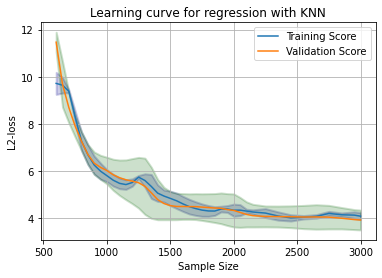

In [633]:
train_scores_mean =  -train_scores.mean(axis = 1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean =  -validation_scores.mean(axis = 1)
validation_scores_std  = validation_scores.std(axis = 1)

xlabel = 'Sample Size'
ylabel = 'L2-loss'

plt_title = 'Learning curve for regression with KNN'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(ns_list, train_scores_mean, label = 'Training Score')
ax.plot(ns_list, validation_scores_mean, label = 'Validation Score')

plt.fill_between(ns_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(ns_list, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)
plt.grid()
ax.legend(loc=0)
plt.savefig('knn learn.pdf',bbox_inches='tight')
plt.show()

# Polynomial

In [20]:
X_train.shape

(6309, 5)

In [534]:
split=np.array(np.array_split(np.arange(0,X_train.shape[0]),20))
#Y_train[split[2]]
#ll=np.arange(0,20,1)
#np.concatenate(list(split[np.delete(ll,1)])).shape

## validation curve 

In [101]:
#scaler=MinMaxScaler()
#X_train=scaler.fit_transform(X_train)

degrees=[1,2,3,4,5,6,7,8,9]
cv=5
ll=np.arange(0,cv,1)
index_list=np.arange(0,X_train.shape[0])
split=np.array(np.array_split(index_list,cv))

train_error=np.zeros((len(degrees),cv))
val_error=np.zeros((len(degrees),cv))
for deg_index,degree in enumerate(degrees):
    print(degree)
    poly_x_train=PolynomialFeatures(degree=degree).fit_transform(X_train)
    #poly_x_test=PolynomialFeatures(degree=degree)
    for part in ll:
        reg=LinearRegression()

        train_sec=np.concatenate(list(split[np.delete(ll,part)]))

        train_x=poly_x_train[train_sec]
        train_y=Y_train[train_sec]

        val_x=poly_x_train[split[part]]
        val_y=Y_train[split[part]]

        reg.fit(train_x,train_y)
        train_error[deg_index,part]=mean_squared_error(reg.predict(train_x),train_y)
        val_error[deg_index,part]=mean_squared_error(reg.predict(val_x),val_y)
        



1
2
3
4
5
6
7
8
9


In [56]:
PolynomialFeatures(1).fit_transform(X_train)

array([[ 1.00000000e+00,  2.86719402e+03,  5.08458192e+01,
         1.97573495e+00, -5.07075996e+00, -1.65352484e+00],
       [ 1.00000000e+00,  3.44306810e+03, -9.40421655e+00,
         1.82060503e+00,  5.99036649e-01, -1.42323379e+00],
       [ 1.00000000e+00,  3.14307683e+03, -3.76384889e+00,
        -1.10769682e+01,  3.77275406e+00, -1.48309256e+00],
       ...,
       [ 1.00000000e+00, -5.81945546e+02, -1.09190773e+01,
        -4.43310104e+00,  1.59728767e+00, -2.77932705e-01],
       [ 1.00000000e+00, -5.79967125e+02, -2.19144798e+01,
         3.48548447e+00, -3.57455937e+00, -3.94962974e-01],
       [ 1.00000000e+00, -5.83925526e+02, -2.91917179e+00,
         1.45118637e+01, -4.59016992e+00, -3.02768004e-01]])

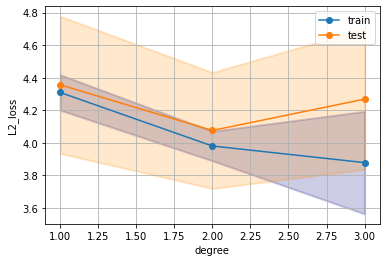

In [106]:
ns=3
train_mean=train_error.mean(axis=1)
valid_mean=val_error.mean(axis=1)

train_std= train_error.std(axis=1)
valid_std= val_error.std(axis=1)

plt.plot(degrees[:ns],train_mean[:ns],'-o',label='train')
plt.plot(degrees[:ns],valid_mean[:ns],'-o',label='test')
plt.grid()
plt.xlabel('degree')
plt.ylabel('L2_loss')

plt.fill_between(degrees[:ns], train_mean[:ns] - train_std[:ns],
                 train_mean[:ns] + train_std[:ns], alpha=0.2,
                 color="navy", lw=2)

plt.fill_between(degrees[:ns], valid_mean[:ns] - valid_std[:ns],
                 valid_mean[:ns] + valid_std[:ns], alpha=0.2,
                 color="darkorange", lw=2)

#plt.yscale('log')
plt.legend()

In [19]:
poly_train=PolynomialFeatures(degree=2).fit_transform(X_train)
poly_test=PolynomialFeatures(degree=2).fit_transform(X_test)
linear=LinearRegression()
linear.fit(poly_train,Y_train)
mean_squared_error(linear.predict(poly_test),Y_test)

3.3245823614266454

let's compare the distribution

(array([   8.,  131.,  729., 1373., 1250.,  901.,  588.,  568.,  637.,
         124.]),
 array([ 4.27666612,  5.91478284,  7.55289955,  9.19101627, 10.82913299,
        12.4672497 , 14.10536642, 15.74348314, 17.38159986, 19.01971657,
        20.65783329]),
 <BarContainer object of 10 artists>)

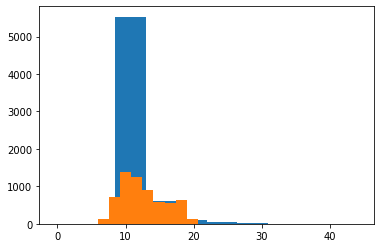

In [583]:
plt.hist(linear.predict(poly_f))
plt.hist(Y_train)

# Random Forest

In [801]:
%%time
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(random_state =0, n_estimators=30, max_depth=30)
RF_model.fit(X_train, Y_train.reshape(1,-1)[0])


Wall time: 855 ms


RandomForestRegressor(max_depth=30, n_estimators=30, random_state=0)

In [802]:
%%time
y_hat = RF_model.predict(X_test)
print ("test R-Squared is:", metrics.r2_score(y_hat, Y_test))
print ("test mean squared is:", mean_squared_error(y_hat, Y_test))

test R-Squared is: 0.6615335608377992
test mean squared is: 2.623306712015641
Wall time: 17 ms


In [803]:
print ("train R-Squared is:", metrics.r2_score(RF_model.predict(X_train), Y_train))
print ("train mean squared is:", mean_squared_error(RF_model.predict(X_train), Y_train))

train R-Squared is: 0.9534601811415705
train mean squared is: 0.4194635774468065


## learning curve 

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [1]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

NameError: name 'np' is not defined

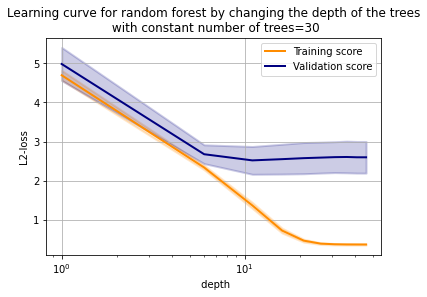

In [745]:
xlabel = ' depth'
ylabel = 'L2-loss'

#plt_title = 'Validation curve for regression with KNN'#.format(k)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel)
plt.semilogx(estimators_list, train_scores_mean,label="Training score",
             color="darkorange", lw=2)
plt.fill_between(estimators_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.semilogx(estimators_list, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(estimators_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.grid()
plt.title('Learning curve for random forest by changing the depth of the trees\n with constant number of trees=30')
plt.savefig('val for random forrest.pdf',bbox_inches='tight')
plt.show()

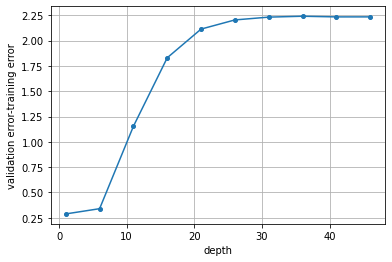

In [748]:
res=valid_scores_mean-train_scores_mean
plt.plot(estimators_list,res,'-o',ms=4)
plt.xlabel('depth')
plt.ylabel('validation error-training error')
index=np.argmin(res)
#plt.plot(estimators_list[index],res[index],'ro')
#plt.text(x=estimators_list[index]-1,y=res[index]+0.3,s='(%i,%.2f)'%(k_list[index],res[index]))
plt.grid()
plt.savefig('opt for random forrest.pdf',bbox_inches='tight')

In [799]:
ns_list=np.arange(1,3000,50)
ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator = RandomForestRegressor(random_state =0, n_estimators=190, max_depth=10), 
                                                   X = X_train, y = Y_train.reshape(1,-1)[0], 
                                                   train_sizes = ns_list, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

## learning curve 

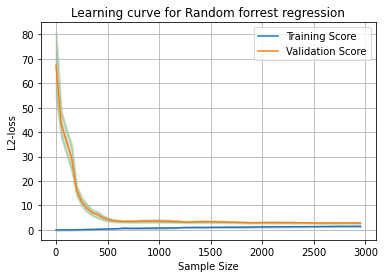

In [800]:
train_scores_mean =  -train_scores.mean(axis = 1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean =  -validation_scores.mean(axis = 1)
validation_scores_std  = validation_scores.std(axis = 1)

xlabel = 'Sample Size'
ylabel = 'L2-loss'

plt_title = 'Learning curve for Random forrest regression'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(ns_list, train_scores_mean, label = 'Training Score')
ax.plot(ns_list, validation_scores_mean, label = 'Validation Score')

plt.fill_between(ns_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(ns_list, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)
plt.grid()
ax.legend(loc=0)
plt.savefig('forest learn opt.pdf',bbox_inches='tight')
plt.show()

In [794]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import expon
params_dist = {'n_estimators': np.arange(50,200,20), 'max_depth':np.arange(10,30,5)}

RF_model = RandomForestRegressor(random_state =0)
opt_RF = GridSearchCV(RF_model, param_grid=params_dist, cv=5, n_jobs=-1)
opt_RF.fit(X_train,Y_train.reshape(1,-1)[0])

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': array([10, 15, 20, 25]),
                         'n_estimators': array([ 50,  70,  90, 110, 130, 150, 170, 190])})

In [795]:
print( f'The optimal values for C and gamma are {opt_RF.best_params_}.\n' )

Y_pred = opt_RF.predict(X_test)
print(f'The MSE for the test data is {r2_score(Y_test, Y_pred):.2f}.\n')


The optimal values for C and gamma are {'max_depth': 10, 'n_estimators': 190}.

The MSE for the test data is 0.71.



In [897]:
scaler=MinMaxScaler()
degree=4
poly_x_train=PolynomialFeatures(degree=degree).fit_transform(X_train)
poly_x_test=PolynomialFeatures(degree=degree).fit_transform(X_test)
x_scaled_train=scaler.fit_transform(poly_x_train)
x_scaled_test=scaler.fit_transform(poly_x_test)

In [898]:
reg=LinearRegression()
reg.fit(x_scaled_train,Y_train)
print('train error:',mean_squared_error(reg.predict(x_scaled_train),Y_train))
print('test error:',r2_score(reg.predict(x_scaled_test),Y_test))

train error: 3.5228167569284703
test error: -11.900945219405397


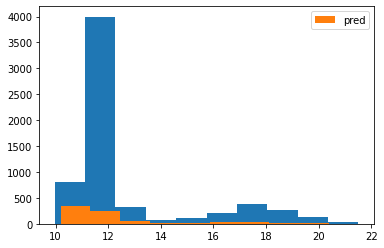

In [891]:
plt.hist(reg.predict(x_scaled_train),)
plt.hist(reg.predict(x_scaled_test),label='pred')
plt.legend()
plt.show()

# SVR with rbf 

In [32]:
from sklearn.svm import SVR


UsageError: Line magic function `%%time` not found.


In [47]:
%%time
svr=SVR(kernel='rbf',gamma=0.0005)
svr.fit(X_train,Y_train.reshape(1,-1)[0])

Wall time: 1.69 s


SVR(gamma=0.0005)

In [48]:
prediction=svr.predict(X_test)
mean_squared_error(prediction,Y_test)

3.530009410031054

## Validation Curve 

In [57]:
estimators_list = np.linspace(0.000005,0.01,20)

train_scores, valid_scores = validation_curve(SVR(kernel='rbf'), X_train, Y_train, 
                                              param_name="gamma",
                                              param_range=estimators_list , cv=5, 
                                              scoring = 'neg_mean_squared_error',
                                              verbose=1, n_jobs=-1
                                             )

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = - np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.0min finished


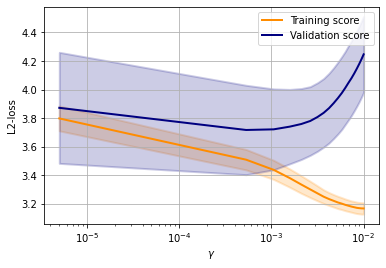

In [58]:
xlabel = '$\gamma$'
ylabel = 'L2-loss'

#plt_title = 'Validation curve for regression with KNN'#.format(k)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel)
plt.semilogx(estimators_list, train_scores_mean,label="Training score",
             color="darkorange", lw=2)
plt.fill_between(estimators_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.semilogx(estimators_list, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(estimators_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.grid()
#plt.savefig('val for knn.pdf',bbox_inches='tight')
plt.show()

# SVR with polynomial 

In [75]:
%%time
svr=SVR(kernel='poly',degree=6)
svr.fit(X_train,Y_train.reshape(1,-1)[0])

Wall time: 45.9 s


SVR(degree=6, kernel='poly')

In [77]:
prediction=svr.predict(X_train)
mean_squared_error(prediction,Y_train)

7.973398813847569

## validation curve 

In [84]:
estimators_list = [1,2,3,4,5,6]

train_scores, valid_scores = validation_curve(SVR(kernel='poly'), X_train, Y_train, 
                                              param_name="degree",
                                              param_range=estimators_list , cv=5, 
                                              scoring = 'neg_mean_squared_error',
                                              verbose=1, n_jobs=-1
                                             )

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = - np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


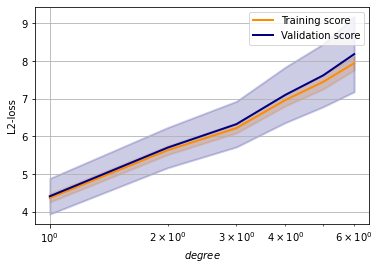

In [85]:
xlabel = '$degree$'
ylabel = 'L2-loss'

#plt_title = 'Validation curve for regression with KNN'#.format(k)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel)
plt.semilogx(estimators_list, train_scores_mean,label="Training score",
             color="darkorange", lw=2)
plt.fill_between(estimators_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.semilogx(estimators_list, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(estimators_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.grid()
#plt.savefig('val for knn.pdf',bbox_inches='tight')
plt.show()